# Weather Trends

## 1. Import Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Extract
I used pandas with `read_csv` function to extract csv to dataframe. Prefered to plot with `matplotlib`
* **cum_sum**: Cumulative summary of global temperature
* **count**: Indicates to nr. of years
* **mov_avg**: Moving average or rolling mean 

In [2]:
df_city = pd.read_csv("data/city_data.csv")

## 3. Exploration

In [3]:
df_city

,year,city,country,avg_temp
0,1743,Amsterdam,Netherlands,7.43
1,1744,Amsterdam,Netherlands,10.31
2,1745,Amsterdam,Netherlands,3.06
3,1746,Amsterdam,Netherlands,NaN
4,1747,Amsterdam,Netherlands,NaN
...,...,...,...,...
266,2009,Amsterdam,Netherlands,10.33
267,2010,Amsterdam,Netherlands,8.84
268,2011,Amsterdam,Netherlands,10.73
269,2012,Amsterdam,Netherlands,10.08


In [4]:
df_global = pd.read_csv("data/global_data.csv")
df_global['cum_sum'] = df_global['avg_temp'].cumsum()
df_global['count'] = range(1, len(df_global['avg_temp'])+1)
df_global['mov_avg'] = df_global['cum_sum'] / df_global['count']

In [5]:
df_global

,year,avg_temp,cum_sum,count,mov_avg
0,1750,8.72,8.72,1,8.720000
1,1751,7.98,16.70,2,8.350000
2,1752,5.78,22.48,3,7.493333
3,1753,8.39,30.87,4,7.717500
4,1754,8.47,39.34,5,7.868000
...,...,...,...,...,...
261,2011,9.52,2187.76,262,8.350229
262,2012,9.51,2197.27,263,8.354639
263,2013,9.61,2206.88,264,8.359394
264,2014,9.57,2216.45,265,8.363962


## 4. Visualisation

### 4.1 Temperature Change in Globe

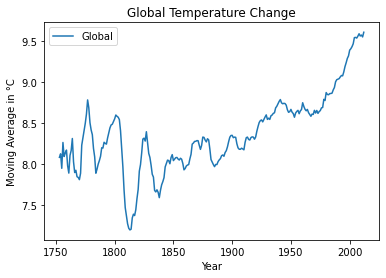

In [60]:
plt.plot(df_global['year'].rolling(7).mean(), df_global['avg_temp'].rolling(7).mean(), label="Global")
plt.legend()
plt.title( 'Global Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt. show()

### 4.2 Temperature Change in Amsterdam

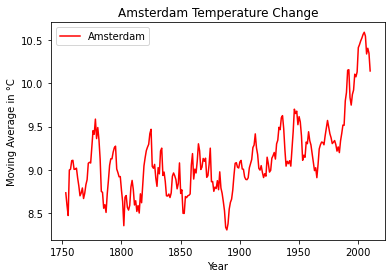

In [64]:
plt.plot(df_city['year'].rolling(7).mean(), df_city['avg_temp'].rolling(7).mean(), label="Amsterdam", color="red")
plt.legend()
plt.title( 'Amsterdam Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt. show()

### 4.3 Comparison

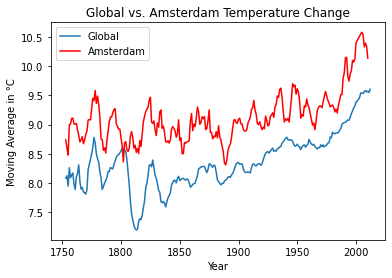

In [66]:
plt.plot(df_global['year'].rolling(7).mean(), df_global['avg_temp'].rolling(7).mean(), label="Global")
plt.plot(df_city['year'].rolling(7).mean(), df_city['avg_temp'].rolling(7).mean(), label="Amsterdam", color="red")
plt.legend()
plt.title( 'Global vs. Amsterdam Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt.show()